In [1]:
import numpy as np
from temporal_difference_learning import TemporalDifferenceLearning

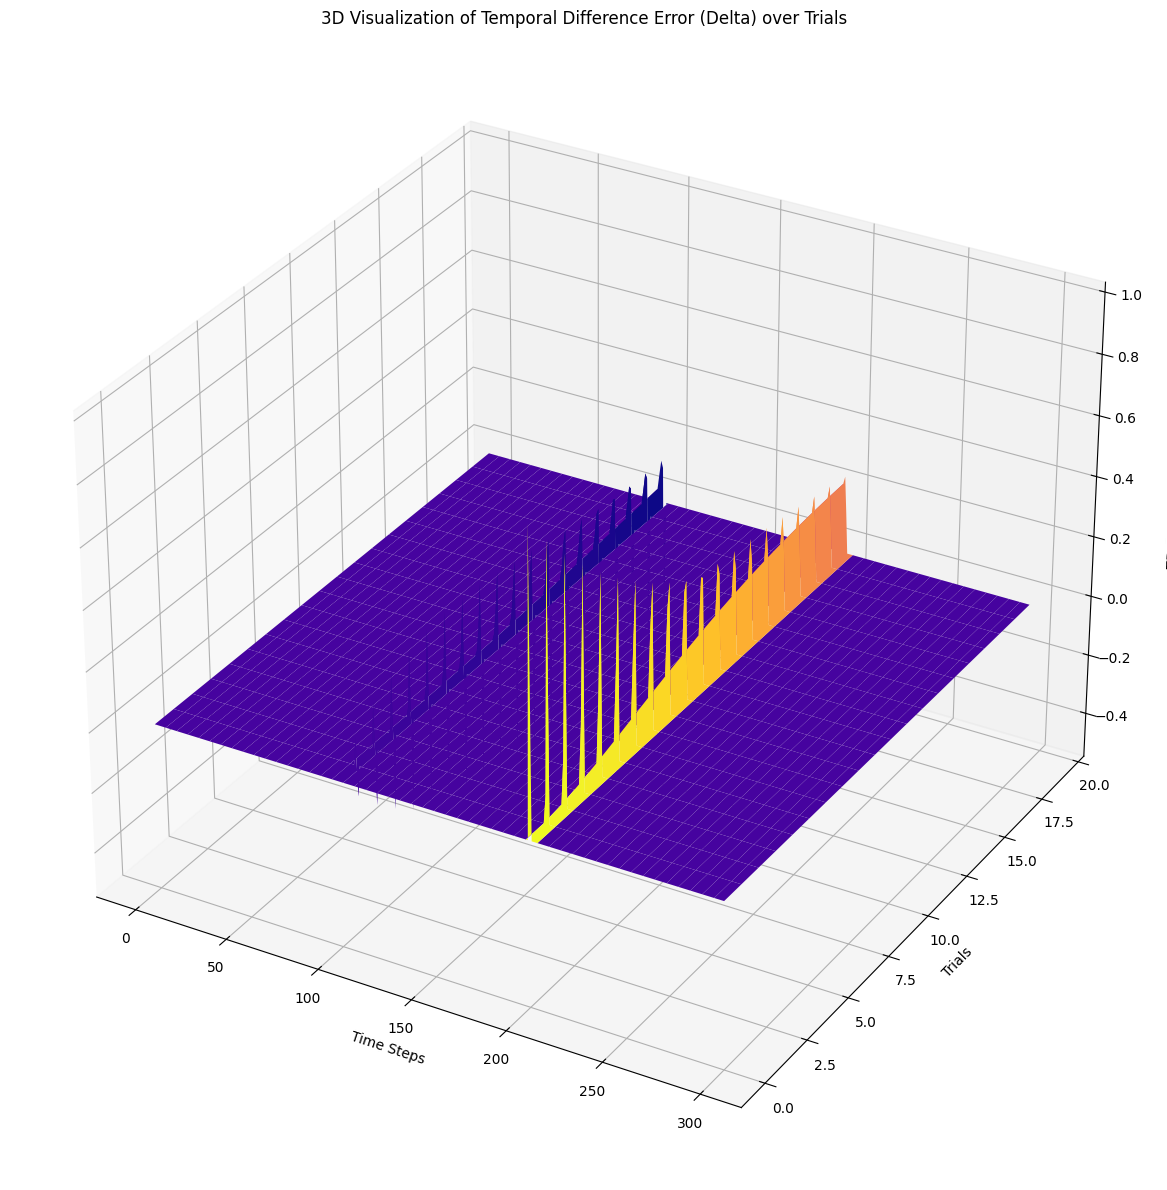

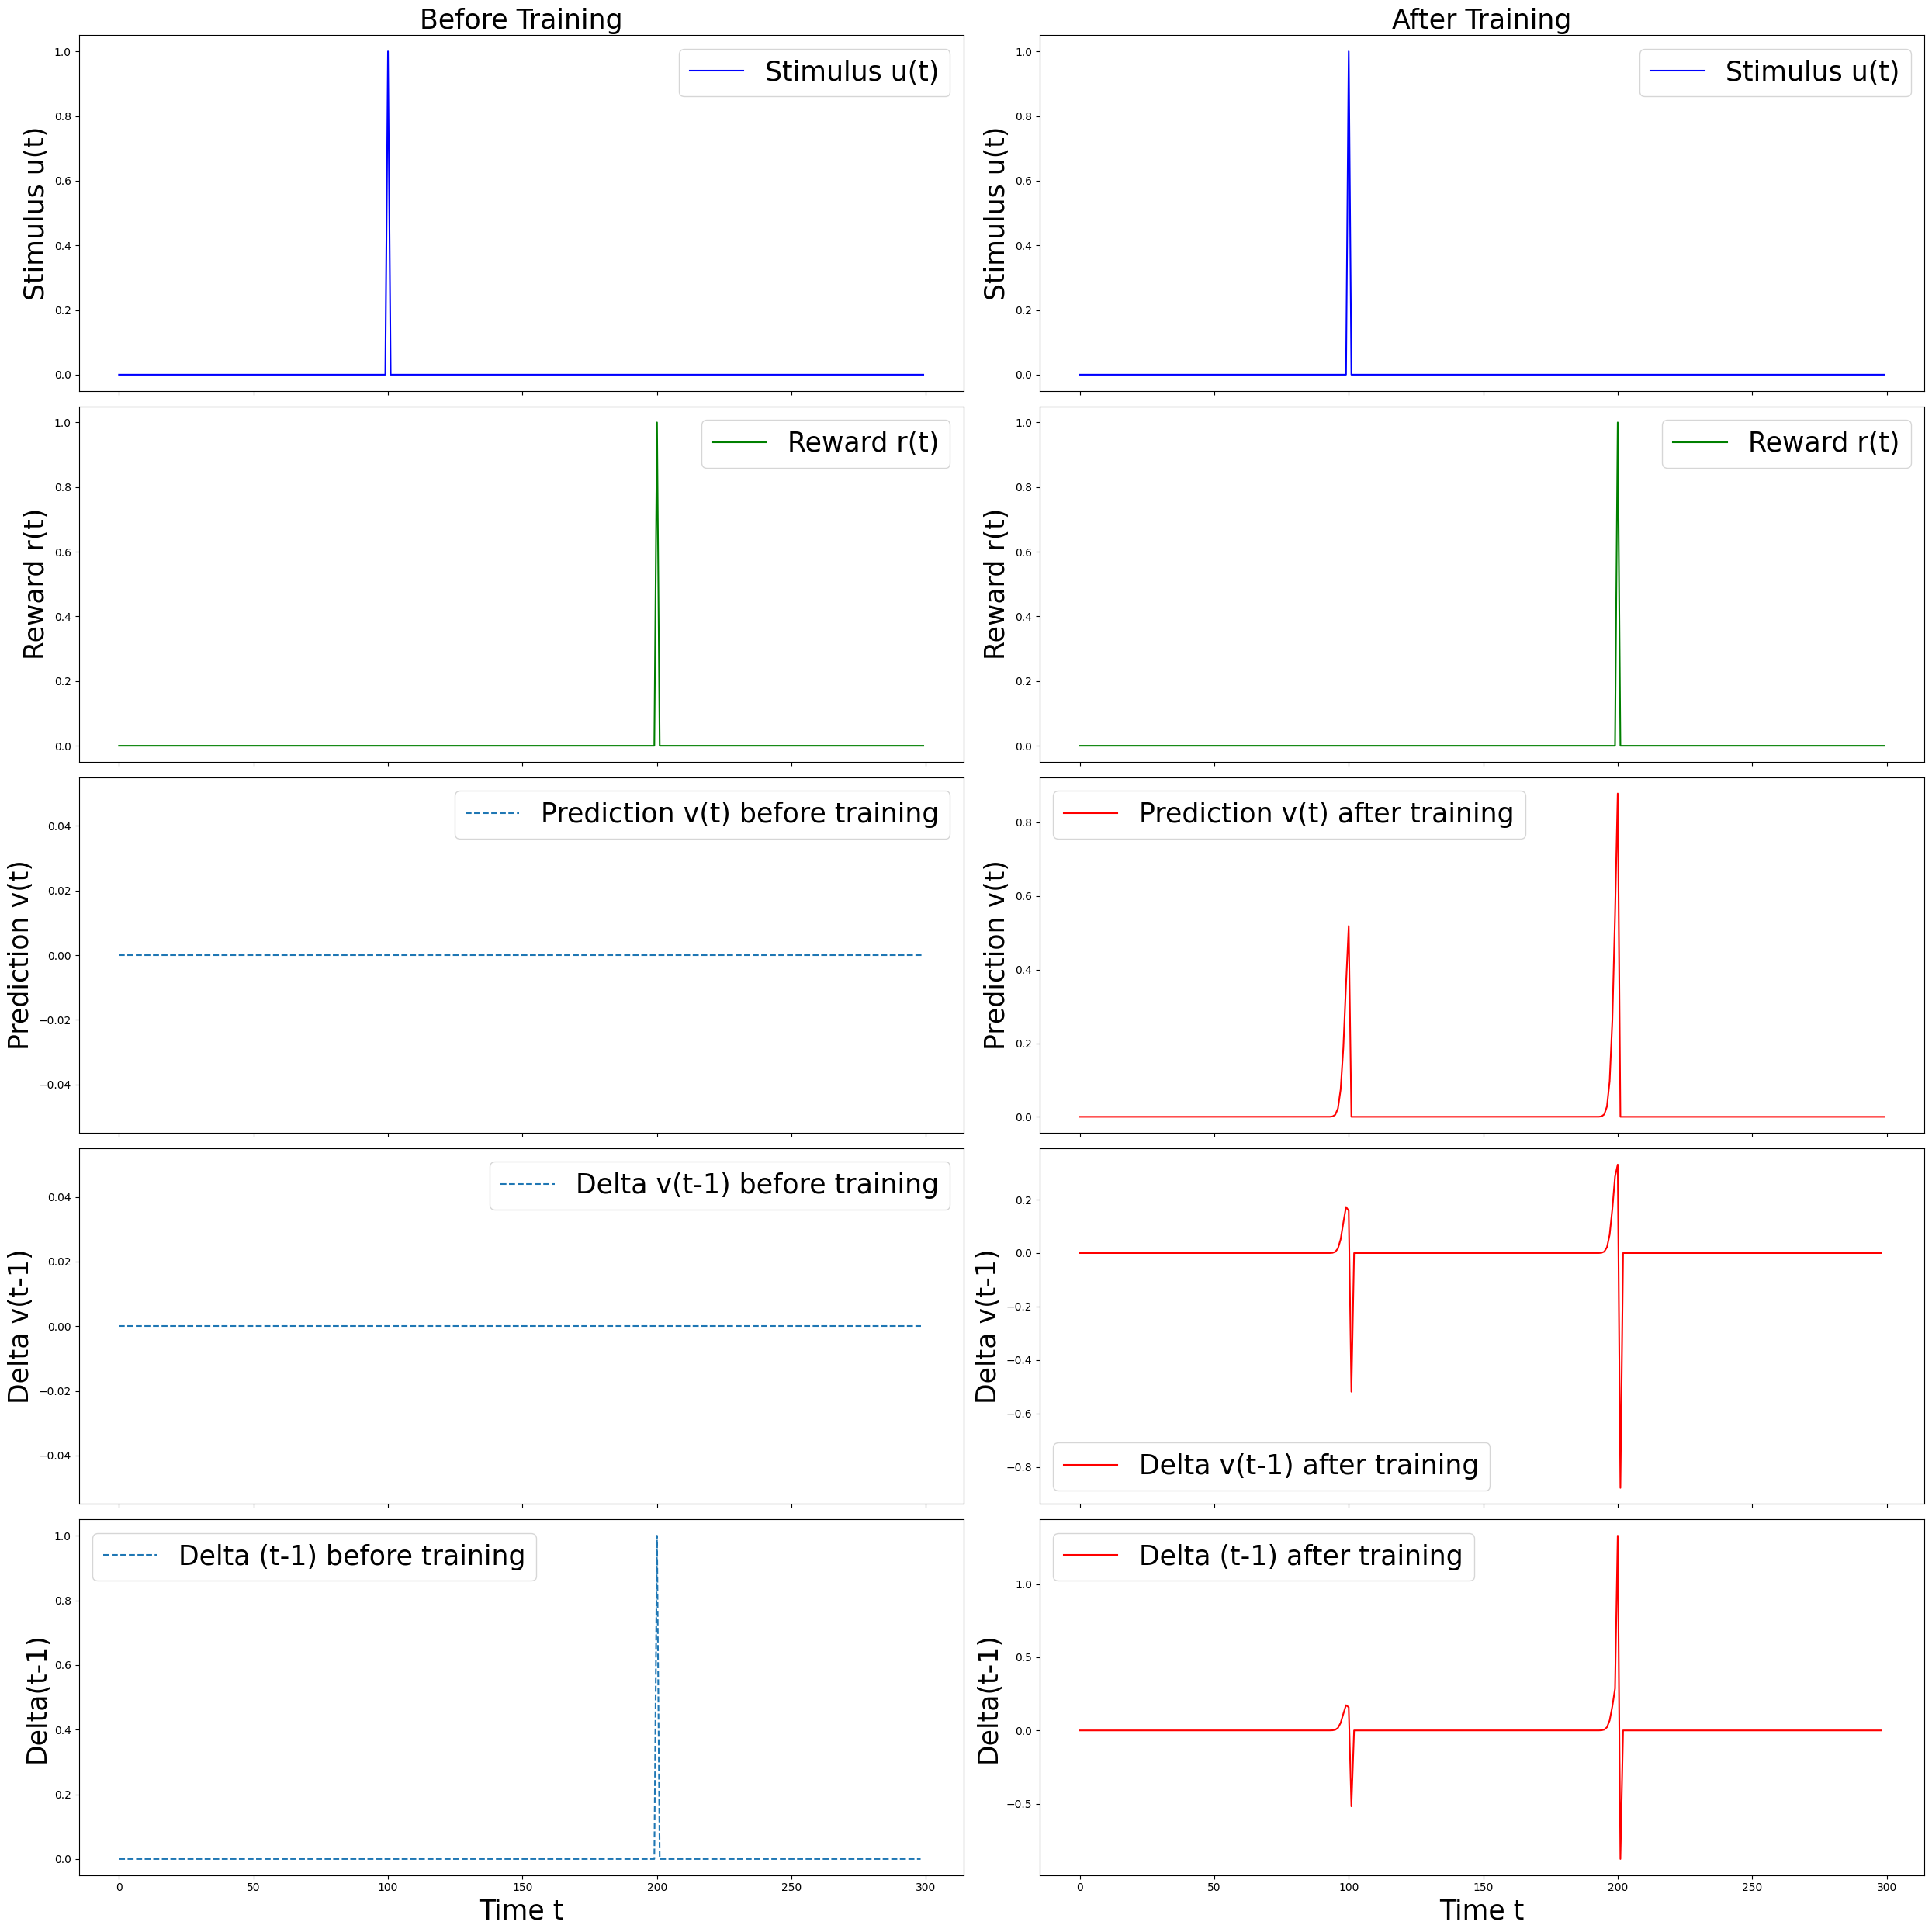

In [2]:
# Step 1: Initialize parameters
n_time_steps = 300  # Number of time steps per trial
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
num_trials = 20  # Number of trials to observe the evolution

# Step 2: Create the Temporal Difference Learning model
td_model = TemporalDifferenceLearning(n_time_steps, alpha, gamma)

# Step 3: Define the stimulus and reward vectors
stimulus_vector = np.zeros(n_time_steps)
reward_vector = np.zeros(n_time_steps)

# Set stimulus and reward times
stimulus_time = 100  # Stimulus at t = 100
reward_time = 200  # Reward at t = 200

stimulus_vector[stimulus_time] = 1
reward_vector[reward_time] = 1

# Step 4: Run trials to observe learning progression
td_model.run_trials(reward_vector, stimulus_vector, num_trials)

# Step 6: Plot the 3D visualization of temporal difference error (delta) over trials
td_model.plot_3d_delta()

# Plot the detailed figure as described in Figure 9.2B
td_model.plot_detailed_figure(stimulus_vector, reward_vector)